In [1]:
import os
import dotenv

import pandas as pd
import pandahouse as ph
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

dotenv.load_dotenv()
connection = {'host': os.getenv('host'),
                      'database':os.getenv('extract_database'),
                      'user':os.getenv('extract_user'), 
                      'password':os.getenv('extract_password')
                     }

DAU_query = '''
SELECT toStartOfDay(toDateTime(time)) AS date,
       count(DISTINCT user_id) AS "unique_users"
FROM simulator_20230320.feed_actions

GROUP BY toStartOfDay(toDateTime(time))
ORDER BY "unique_users" DESC
LIMIT 50000;'''
'''
select 
    user_id,
    toDate(time) as date,
    country,
    city,
    os,
    source
from {db}.feed_actions
where date between '2023-03-08' and '2023-03-22'
'''
DAU = ph.read_clickhouse(DAU_query, connection=connection)


In [2]:
DAU.head()

,date,unique_users
0,2023-04-04,20584
1,2023-04-05,20322
2,2023-04-02,20316
3,2023-04-03,20187
4,2023-05-09,20021


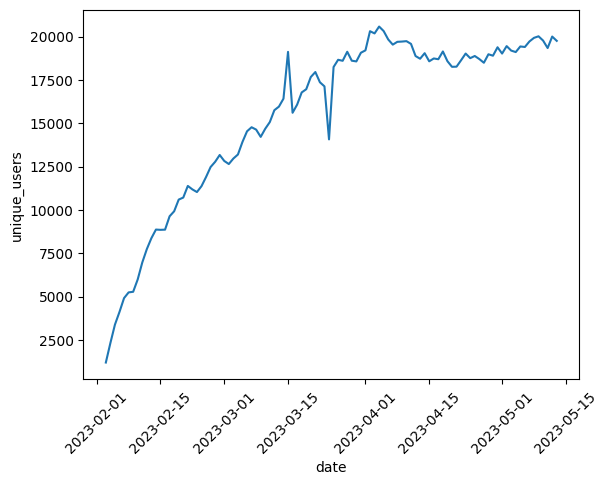

In [3]:
plot = sns.lineplot(data=DAU, x="date", y="unique_users")
plt.setp(plot.get_xticklabels(), rotation=45)
plt.show()

Маркетологи запустили массивную рекламную кампанию, в результате в приложение пришло довольно много новых пользователей, можно видеть всплеск на графике активной аудитории. Однако у нас есть сомнение в качестве трафика, что стало с рекламными пользователями в дальнейшем, как часто они продолжают пользоваться приложением?